In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("diamonds.csv")

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


<Axes: ylabel='x'>

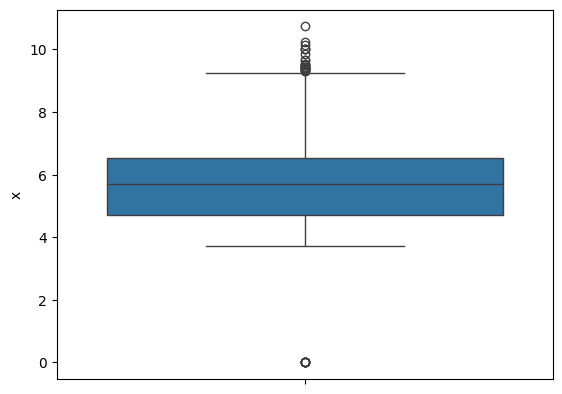

In [16]:
sns.boxplot(y=df['x'])


<Axes: ylabel='x'>

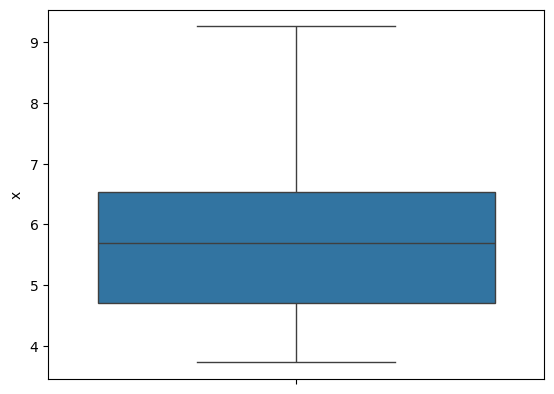

In [17]:
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['x'] > lower_bound) & (df['x'] < upper_bound)]

sns.boxplot(y=df['x'])

In [ ]:
cols=['carat','depth','table','x','y','z']
for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    plt.figure()
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

    sns.boxplot(y=df[i])

In [19]:
# Check for duplicates

df.duplicated().sum()


np.int64(112)

In [20]:
# Drop duplicate values

df=df.drop_duplicates()


In [21]:
df.duplicated().sum()


np.int64(0)

In [22]:
df.shape  #show the rows and columns of dataset


(48786, 10)

In [23]:
# Check null values

df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [25]:
# Encode cut values into numeric values

df['cut']=df['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})


/var/folders/93/vlx4nms139q5z39xrctn9jjw0000gn/T/ipykernel_51806/2236804770.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cut']=df['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})


In [27]:
df['color']=df['color'].replace({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})


/var/folders/93/vlx4nms139q5z39xrctn9jjw0000gn/T/ipykernel_51806/287539461.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['color']=df['color'].replace({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})


In [28]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [37]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [38]:
df['clarity']=df['clarity'].replace({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})


/var/folders/93/vlx4nms139q5z39xrctn9jjw0000gn/T/ipykernel_51806/3504515837.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clarity']=df['clarity'].replace({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})


In [39]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


In [40]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.114501,-0.234122,-0.312913,0.032282,0.180363,0.909186,0.985213,0.984539,0.984177
cut,-0.114501,1.000000,0.012142,0.163898,-0.282223,-0.407120,-0.048370,-0.097911,-0.101755,-0.126883
color,-0.234122,0.012142,1.000000,-0.054684,-0.043846,-0.018485,-0.098694,-0.217952,-0.217947,-0.221105
clarity,-0.312913,0.163898,-0.054684,1.000000,-0.072331,-0.153407,-0.081542,-0.334097,-0.329129,-0.337027
depth,0.032282,-0.282223,-0.043846,-0.072331,1.000000,-0.229202,-0.000723,-0.010268,-0.012020,0.086542
table,0.180363,-0.407120,-0.018485,-0.153407,-0.229202,1.000000,0.121361,0.181513,0.176332,0.157006
price,0.909186,-0.048370,-0.098694,-0.081542,-0.000723,0.121361,1.000000,0.875071,0.876362,0.871885
x,0.985213,-0.097911,-0.217952,-0.334097,-0.010268,0.181513,0.875071,1.000000,0.998643,0.994082
y,0.984539,-0.101755,-0.217947,-0.329129,-0.012020,0.176332,0.876362,0.998643,1.000000,0.993904
z,0.984177,-0.126883,-0.221105,-0.337027,0.086542,0.157006,0.871885,0.994082,0.993904,1.000000


<Axes: >

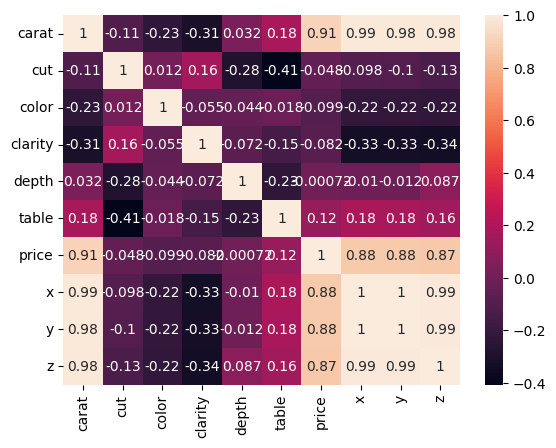

In [42]:
corrmat=df.corr()
sns.heatmap(corrmat,annot=True)


In [74]:
X= df.drop(["price"],axis =1).values
y= df["price"].values

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [48]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
reg=LinearRegression()

In [60]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}

In [61]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [62]:
trained_model_list = []
model_list = []
r2_list = []

In [65]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()


In [69]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #Prediction
    y_pred = model.predict(X_test)

    mae,rmse,r2_square = evaluate_model(y_test,y_pred)

    
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print(f'Model: {list(models.keys())[i]}')
    print('RMSE:',rmse)
    print('MAE:',mae)
    print('R2 Sqaure:',r2_square*100)

    r2_list.append(r2_square)

    print('='*35)
    print('\n')

Model Training Performance
Model: LinearRegression
RMSE: 1044.8994741971526
MAE: 714.7558754779151
R2 Sqaure: 90.62433994899119


Model Training Performance
Model: Lasso
RMSE: 1044.3576837737
MAE: 714.4350088777996
R2 Sqaure: 90.63406016807976


Model Training Performance
Model: Ridge
RMSE: 1044.837817882541
MAE: 714.7596941420662
R2 Sqaure: 90.62544637425992


Model Training Performance
Model: Elasticnet
RMSE: 1396.4846161736739
MAE: 923.1930730772823
R2 Sqaure: 83.25345802286657




/Users/dhirajpoddar/Library/Caches/pypoetry/virtualenvs/mlops_end_to_end_project-umDrlBaa-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+09, tolerance: 4.613e+07
  model = cd_fast.enet_coordinate_descent(


In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [81]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


In [105]:
df = pd.read_csv("diamonds.csv")

In [129]:
X = df.drop(["price"],axis =1)
y = df["price"]

In [131]:
X


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [132]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [141]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [134]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [137]:
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
color_categories = ['D','E','F','G','H','I','J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [148]:
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
        ("scaler",StandardScaler())
     
    ]
)


In [145]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [147]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, num_cols),
        ("cat_pipeline", cat_pipeline, cat_cols)
    ]
)

In [118]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
preprocessor.fit_transform(X_train)

In [150]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

In [153]:
X_test = pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())